# Supervised Learning
- **Regression**: Input -> Continuous Value
- **Classification**: Input -> Discrete Value(Class, Label, Category, ...)

## Object
- Training Data에 없는 Test Data에 대해서 사람의 나이 x에 대해 그 사람의 키 t를 예측

\begin{aligned}
    &X_n = 16 \\
    &X \;= 5 + 25 \times \text{(random value)} \\
    &T \enspace= 170 - 108 \times e^{-0.2 \times X} + 4 \times \text{(random value)}
\end{aligned}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 생성
np.random.seed(1)
X_min = 4
X_max = 30
X_n = 16
X = 5 + 25*np.random.rand(X_n) # 0~1
Prm_c = [170, 108, 0.2] # 생성 매개변수
T = Prm_c[0] - Prm_c[1]*np.exp(-Prm_c[2]*X) + 4*np.random.randn(X_n) # (0, 1)Gaussian Distribution

In [2]:
# Training Data
print(np.round(X, 2))

# Target Data
print(np.round(T, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


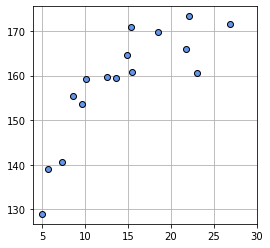

In [3]:
plt.figure(figsize=(4,4))
plt.plot(X, T, marker='o', linestyle='None',
         markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(1)
plt.show()

### Linear Regression
$$
    y(x) = w_0x + w_1
$$

### MSE(Mean Square Error)

\begin{aligned}
    &J = \displaystyle \sum_{n=0}^{N-1}{(y_n-t_n)^2} \\
    \textbf{where}\\
    &y_n = y(x_n) = w_0x_n + w_1
\end{aligned}

In [4]:
# interaction between w and J

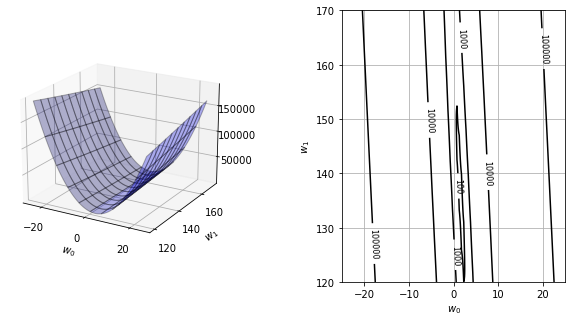

In [7]:
from mpl_toolkits.mplot3d import Axes3D
# Mean Square Error---------------------------
def mse_line(x, t, w):
    y = w[0]*x + w[1]
    mse = np.mean((y-t)**2)
    return mse

# w0 = 3, w1 = 135 근처에서 J가 최소값
if __name__=="__main__":
    wn = 100
    w0_range = [-25, 25]
    w1_range = [120, 170]
    w0 = np.linspace(w0_range[0], w0_range[1], wn)
    w1 = np.linspace(w1_range[0], w1_range[1], wn)
    ww0, ww1 = np.meshgrid(w0, w1)
    J = np.zeros((len(w0), len(w1)))

    for i1 in range(wn):
        for i0 in range(wn):
            J[i1, i0] = mse_line(X, T, (w0[i0], w1[i1])) # 중첩 for 문에서 i0, i1의 순서는 상관 없음

    plt.figure(figsize=(10, 5))
    plt.subplots_adjust(wspace=0.5)

    ax = plt.subplot(1, 2, 1, projection='3d')
    ax.plot_surface(ww0, ww1, J, rstride=10, cstride=10, alpha=0.3,
                    color='blue', edgecolor='k')
    ax.set_xticks([-20, 0, 20])
    ax.set_yticks([120,140,160])
    ax.set_xlabel('$w_0$')
    ax.set_ylabel('$w_1$')
    ax.view_init(20, -60)

    plt.subplot(1, 2, 2)
    cont = plt.contour(ww0, ww1, J, 30, colors='k',
                      levels=[100, 1000, 10000, 100000])
    cont.clabel(fmt='%1.0f', fontsize=8)
    plt.xlabel('$w_0$')
    plt.ylabel('$w_1$')
    plt.grid(True)
    plt.show()

## Gradient Descent
- gradient of $J$
- $
\nabla_W J = \left[ \cfrac {\partial J}{\partial w_0}, \cfrac {\partial J}{\partial w_1} \right]^T
$
- $J$를 최소화하려면 $J$의 기울기의 반대방향 $-\nabla_W J = - \left[ \cfrac {\partial J}{\partial w_0}, \cfrac {\partial J}{\partial w_1} \right]^T$으로 진행  

### $W$ **Update**
- $w_0(t+1) = w_0(t) - \alpha \cfrac{\partial J}{\partial w_0} \bigg| _{w_0(t),w_1(t)} $
- $w_1(t+1) = w_1(t) - \alpha \cfrac{\partial J}{\partial w_1} \bigg| _{w_0(t),w_1(t)} $

### $J$ **Partial Derivative**
- $ \cfrac{\partial J}{\partial w_0} = \cfrac{2}{N} \displaystyle\sum_{n=0}^{N-1}(w_0x_n + w_1 - t_n)x_n = \cfrac{2}{N}\displaystyle\sum_{n=0}^{N-1}(y_n-t_n)x_n$
- $ \cfrac{\partial J}{\partial w_1} = \cfrac{2}{N} \displaystyle\sum_{n=0}^{N-1}(w_0x_n + w_1 - t_n) = \cfrac{2}{N}\displaystyle\sum_{n=0}^{N-1}(y_n-t_n)$

### $W$ Update (J Partial Derivative)
- $w_0(t+1) = w_0(t) - \alpha \cfrac{2}{N}\displaystyle\sum_{n=0}^{N-1}(y_n-t_n)x_n$
- $w_1(t+1) = w_1(t) - \alpha \cfrac{2}{N}\displaystyle\sum_{n=0}^{N-1}(y_n-t_n)$

In [6]:
# The Gradient of Mean Squarae Error-------------------------
def dmse_line(x, t, w):
    y = w[0]*x + w[1]
    d_w0 = 2*np.mean((y-t)*x)
    d_w1 = 2*np.mean(y-t)
    return d_w0, d_w1

if __name__ == "__main__": # 초기값 w = [10, 165]에서의 기울기
    d_w = dmse_line(X, T, [10, 165])
    print(np.round(d_w, 1))

[5046.3  301.8]


Iter = 1000, MSE = 118.65792631796117
Iter = 2000, MSE = 85.10901957999423
Iter = 3000, MSE = 67.72089007209885
Iter = 4000, MSE = 58.70876189323366
Iter = 5000, MSE = 54.037848079564846
Iter = 6000, MSE = 51.61695088173184
Iter = 7000, MSE = 50.36221926469264
Iter = 8000, MSE = 49.711901922755324
Iter = 9000, MSE = 49.37484765594573
Iter = 10000, MSE = 49.20015513054549
Iter = 11000, MSE = 49.10961339458228
Iter = 12000, MSE = 49.062686338416256
Iter = 13000, MSE = 49.038364421269826
반복횟수 13820
W=[1.539947, 136.176160]
dMSE=[-0.005794, 0.099991]
MSE=49.027452


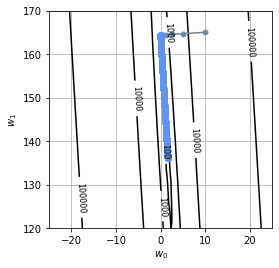

In [15]:
# Gradient Descent Method -----------------------------------
def fit_line_num(x, t):
    w_init = [10.0, 165.0] # Weight Initialization
    alpha = 0.001 # Learning Rate
    i_max = 100000 # Iterations
    eps = 0.1 # 반복을 종료하는 조건(기울기의 절대값)
    w_i = np.zeros([i_max, 2]) # iteration 별 w=[w0,w1] 값의 변경내역
    w_i[0, :] = w_init # 1행을 초기값으로
    for i in range(1, i_max): # 1~99999
        mse = mse_line(x, t, w_i[i-1])
        if i % 1000 == 0:
            print("Iter = {0}, MSE = {1}" .format(i, mse))
        dmse = dmse_line(x, t, w_i[i-1])
        w_i[i, 0] = w_i[i-1, 0] - alpha*dmse[0]
        w_i[i, 1] = w_i[i-1, 1] - alpha*dmse[1]
        if max(np.absolute(dmse)) < eps:
            break
    w0 = w_i[i,0]
    w1 = w_i[i,1]
    w_i = w_i[:i, :]
    return w0, w1, dmse, w_i

# Main Code --------------------------------------------------
plt.figure(figsize=(4, 4))
wn = 100 # 등고선 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
w0 = np.linspace(w0_range[0], w0_range[1], wn)
w1 = np.linspace(w1_range[0], w1_range[1], wn)
ww0, ww1 = np.meshgrid(w0, w1)
J = np.zeros((len(w0), len(w1))) # MSE Value Initialization
for i1 in range(wn):
    for i0 in range(wn):
        J[i1, i0] = mse_line(X, T, (w0[i0], w1[i1]))

cont = plt.contour(ww0, ww1, J, 30, colors='k',
                   levels=(100, 1000, 10000, 100000))
cont.clabel(fmt='%1.0f', fontsize=8)
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.grid(True)

W0, W1, dMSE, W_history = fit_line_num(X, T)

print('반복횟수 {}' .format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]' .format(W0, W1))
print('dMSE=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-', 
         color='grey', markersize=10, markeredgecolor='cornflowerblue')
plt.show()

w0=1.540, w1=136.176
MSE=49.027 cm
SD=7.002 cm


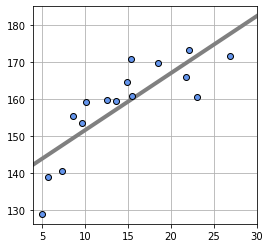

In [23]:
# Regression Line------------------
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0]*xb + w[1]
    plt.plot(xb, y, color = (.5, .5, .5), linewidth = 4)
    
# Main Code --------------------------------------------------
plt.figure(figsize=(4, 4))
W = np.array([W0, W1])
mse = mse_line(X, T, W)
print("w0={0:.3f}, w1={1:.3f}".format(W0, W1))
print("MSE={0:.3f} cm".format(mse))
print("SD={0:.3f} cm".format(np.sqrt(mse))) # Standard Deviation
show_line(W)
plt.plot(X, T, marker='o', linestyle = 'None',
         color='cornflowerblue', markeredgecolor='k')
plt.xlim(4, 30)
plt.grid(1)
plt.show()

### 선형 모델 매개변수의 해석해
- **수치해**: 경사하강법을 이용한 근사값
- **해석해**: 방정식을 이용한 정확한 값
    - **목표**: $J$가 극소화되는 $W$ 찾기
    - 빠르게 찾을 수 있으나 비선형 모델 같은 경우는 해석해를 못구하는 경우가 많음

## Object
- 2차원 입력 면모델
    - **Input Data**: 2차원 $\textbf{x} = (x_0, x_1)$
    - 예) Data = (age, weight)

$
\qquad \textbf{x} =
    \begin{bmatrix}
        x_{00} & x_{01} \\
        x_{10} & x_{11} \\
        \vdots & \vdots \\
        x_{N_1, 0} & x_{N-1, 1}
    \end{bmatrix},
\qquad \textbf{t} =
    \begin{bmatrix}
        t_{0} \\
        t_{1} \\
        \vdots \\
        t_{N-1}
    \end{bmatrix}
$

**Make Sample Data** (Input, Output)
$$
 \text{몸무게} = 23 \times (\cfrac{\text{키}}{100})^2+\text{노이즈}
 $$

In [45]:
# 2차원 데이터 생성
import numpy as np

np.random.seed(1)
X_n = 16
X = 5 + 25*np.random.rand(X_n) # 0~1

X0 = X # 나이
X0_min = 5
X0_max = 30


Prm_c = [170, 108, 0.2] # 생성 매개변수
T = Prm_c[0] - Prm_c[1]*np.exp(-Prm_c[2]*X) + 4*np.random.randn(X_n) # 키

np.random.seed(1)
X1 = 23 * (T / 100)**2 + 2*np.random.randn(X_n) # 몸무게
X1_min = 40
X1_max = 75

print(np.round(X0, 2))
print(np.round(X1, 2))
print(np.round(T, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


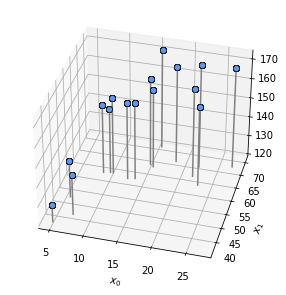

In [46]:
# 2차원 데이터 표시
import matplotlib.pyplot as plt
%matplotlib inline

def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]],
                 [120, t[i]], color='grey')
        ax.plot(x0, x1, t, 'o',
                color = 'cornflowerblue', markeredgecolor='k',
                markersize=6, markeredgewidth=0.5)
        ax.view_init(35, -75)

if __name__=='__main__':
    plt.figure(figsize=(6, 5))
    ax = plt.subplot(1,1,1, projection='3d')
    ax.set_xlabel('$x_0$')
    ax.set_ylabel('$x_1$')
    show_data2(ax, X0, X1, T)
    plt.show()

### 면모델
$\qquad y(x_0, x_1) = w_0x_0 + w_1x_1 + w_2 $

행렬식으로 나타내면:
$
    \qquad \textbf{y} = \textbf{w}^T \textbf{x}
    \qquad \text{where}
    \qquad \textbf{x} = 
        \begin{bmatrix}
            x_0 \\
            x_1 \\
            1
        \end{bmatrix},
    \qquad \textbf{w} =
        \begin{bmatrix}
            w_0 \\
            w_1 \\
            w_2
        \end{bmatrix}
$

### Mean Square Error

$
    \qquad J = \frac{1}{N}\sum\limits_{n=0}^{N-1}{(y_n-t_n)^2}
    \qquad \text{where}
    \qquad y_n = y(x_{n0},x_{n1}) = w_0x_{n0} + w_1x_{n1} + w_2
$


SD=46.237 cm


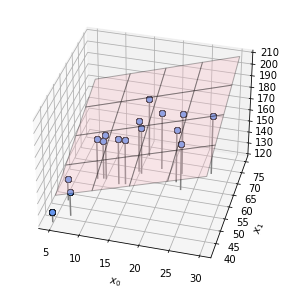

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def show_plane(ax, w):
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)
    px0, px1 = np.meshgrid(px0, px1)
    y = w[0]*px0 + w[1]*px1 + w[2]
    ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3,
                    color='pink', edgecolor='k')

def mse_plane(x0, x1, t, w):
    y = w[0]*x0 + w[1] + w[2]
    mse = np.mean((y-t)**2)
    return mse

if __name__=="__main__":
    plt.figure(figsize=(6, 5))
    ax = plt.subplot(1, 1, 1, projection='3d')
    W = [1.5, 1, 90] # Test
    show_plane(ax, W)
    ax.set_xlabel('$x_0$')
    ax.set_ylabel('$x_1$')
    show_data2(ax, X0, X1, T)
    mse = mse_plane(X0, X1, T, W)
    print("SD={0:.3f} cm".format(np.sqrt(mse)))
    plt.show()

### $W$ Update (J Partial Derivative)

$\qquad w_0(t+1) = w_0(t) - \alpha\frac{2}{N}\sum\limits_{n=0}^{N-1}{(y_n-t_n)x_{n0}}$

$\qquad w_1(t+1) = w_1(t) - \alpha\frac{2}{N}\sum\limits_{n=0}^{N-1}{(y_n-t_n)x_{n1}}$

$\qquad w_2(t+1) = w_2(t) - \alpha\frac{2}{N}\sum\limits_{n=0}^{N-1}{(y_n-t_n)}$

In [50]:
def dmse_plane(x0, x1, t, w):
    y = w[0]*x0 + w[1]*x1 + w[2]
    d_w0 = 2*np.mean((y-t)*x0)
    d_w1 = 2*np.mean((y-t)*x1)
    d_w2 = 2*np.mean(y-t)
    return d_w0, d_w1, d_w2

In [ ]:
# Gradient Descent Method -----------------------------------
def fit_line_num(x, t):
    w_init = [1, 2, 10] # Weight Initialization
    alpha = 0.001 # Learning Rate
    i_max = 100000 # Iterations
    eps = 0.1 # 반복을 종료하는 조건(기울기의 절대값)
    w_i = np.zeros([i_max, 3]) # iteration 별 w=[w0,w1,w2] 값의 변경내역
    w_i[0, :] = w_init # 1행을 초기값으로
    print("Initial MSE =", np.round(mse_plane(x0, x1, t, w_i[0,:]), 3), " W =", np.round(w_i[0, :], 3))
    for i in range(1, i_max): # 1~99999
        mse = mse_plane(x0, x1, t, w_i[i-1])
        dmse = dmse_plane(x0, x1, t, w_i[i-1])
        if i % 1000 == 0:
            print("Iter = {0}, MSE = {1}, dMSE = {2}" .format(i, np.round(mse, 3), np.round(dmse, 3))
        w_i[i, 0] = w_i[i-1, 0] - alpha*dmse[0]
        w_i[i, 1] = w_i[i-1, 1] - alpha*dmse[1]
        w_i[i, 2] = w_i[i-1, 2] - alpha*dmse[2]
        if max(np.absolute(dmse)) < eps:
            break
    w0 = w_i[i,0]
    w1 = w_i[i,1]
    w2 = w_i[i,2]
    w_i = w_i[:i, :]
    return w0, w1, dmse, w_i

# Main Code --------------------------------------------------
plt.figure(figsize=(4, 4))
wn = 100 # 등고선 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
w0 = np.linspace(w0_range[0], w0_range[1], wn)
w1 = np.linspace(w1_range[0], w1_range[1], wn)
ww0, ww1 = np.meshgrid(w0, w1)
J = np.zeros((len(w0), len(w1))) # MSE Value Initialization
for i1 in range(wn):
    for i0 in range(wn):
        J[i1, i0] = mse_line(X, T, (w0[i0], w1[i1]))

cont = plt.contour(ww0, ww1, J, 30, colors='k',
                   levels=(100, 1000, 10000, 100000))
cont.clabel(fmt='%1.0f', fontsize=8)
plt.xlabel('$w_0$')
plt.ylabel('$w_1$')
plt.grid(True)

W0, W1, dMSE, W_history = fit_line_num(X, T)

print('반복횟수 {}' .format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]' .format(W0, W1))
print('dMSE=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-', 
         color='grey', markersize=10, markeredgecolor='cornflowerblue')
plt.show()